In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
import h5py
import time
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Here we are importing the h5 file and create a dataframe.

In [2]:
file = h5py.File('Data_Fuchs_v_2.7_Wright_Pat_Narrow_Range_energy_limit_0.01_deviation_0.0_lambda_um_0.8_points_100000_seed_3.h5','r')
file_dict = dict()
for i in file.keys():
    file_dict[i] = file[i][:]
file.close()
physics = pd.DataFrame(file_dict)

# Here we specify the input and output variables

In [3]:
outputs = ['Max_Proton_Energy_(MeV)', 'Total_Proton_Energy_(MeV)', 'Avg_Proton_Energy_(MeV)']

In [4]:
# this is to avoid copying a pasting
inputs = []
for i in physics.columns:
    if i in outputs:
        continue
    else:
        inputs.append(i)
inputs

['Intensity_(W_cm2)',
 'Pulse_Duration_(fs)',
 'Spot_Size_(FWHM um)',
 'Target_Thickness (um)']

##### For now, we will work with a dataframe that only has Max Proton Energy as the output variable and name it df.

In [5]:
df = physics.copy()
df = df.drop(columns= outputs[1:])
df.columns

Index(['Intensity_(W_cm2)', 'Max_Proton_Energy_(MeV)', 'Pulse_Duration_(fs)',
       'Spot_Size_(FWHM um)', 'Target_Thickness (um)'],
      dtype='object')

##### The train and split sets will also be created here for df.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(df[[inputs[0], inputs[3]]], df[outputs[0]], test_size=0.33, random_state=0)

##### Normalizing the data

In [7]:
means = X_train.mean()
stds = X_train.std(ddof=1)
X_train_norm = (X_train - means) / stds

In [8]:
X_train_norm.head()

,Intensity_(W_cm2),Target_Thickness (um)
32684,-0.164531,1.047151
77206,-1.200541,0.306467
17196,-0.065437,0.991962
94613,0.479241,1.291706
61769,-0.376358,-1.637519


# Scatter plot of the data to be modeled.

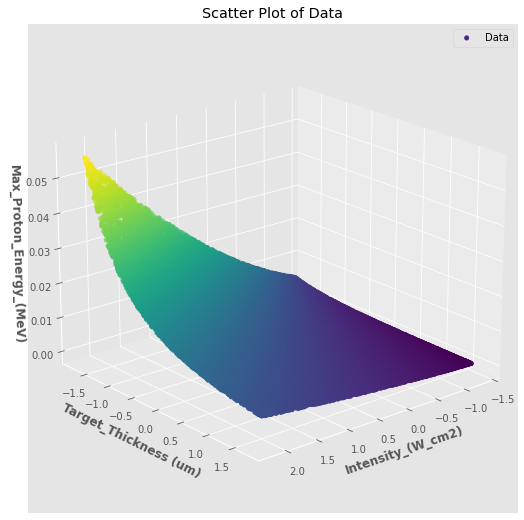

In [9]:
fig1 = plt.figure(figsize=(9, 9))
ax = fig1.add_subplot(projection='3d')
ax.scatter(X_train_norm[inputs[0]],
           X_train_norm[inputs[3]],
           y_train,
           c = np.sqrt(y_train),
           label = "Data")
ax.set_title('Scatter Plot of Data')
ax.set_xlabel(f'{inputs[0]}', fontweight ='bold')
ax.set_ylabel(f'{inputs[3]}', fontweight ='bold')
ax.set_zlabel(f'{outputs[0]}', fontweight ='bold')
ax.view_init(20, 50)
plt.legend(loc="upper right")
plt.show()

# Support Vector Regression model (SVR)

##### First we create a model to predict the values of the X test set to see what the predictions look like.

In [10]:
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.09, coef0=1)

In [11]:
svr_poly.fit(X_train_norm[[inputs[0], inputs[3]]], np.log(y_train))

SVR(C=100, coef0=1, epsilon=0.09, gamma='auto', kernel='poly')

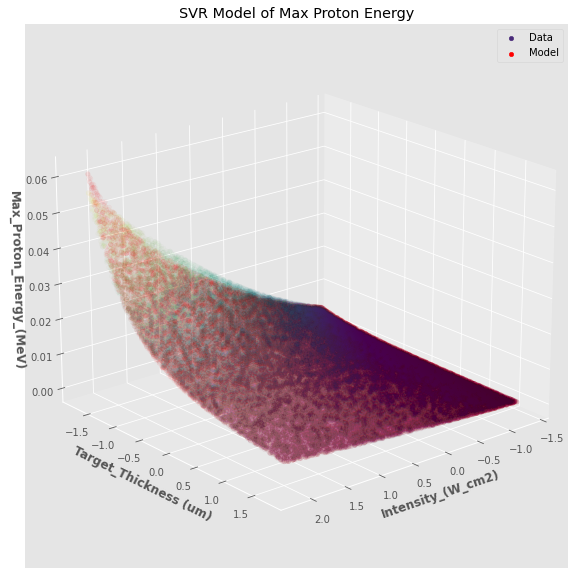

In [15]:
fig2 = plt.figure(figsize=(10, 10))
ax = fig2.add_subplot(projection='3d')
ax.scatter(X_train_norm[inputs[0]],
           X_train_norm[inputs[3]],
           y_train,
           c = np.sqrt(y_train),
           alpha = .025,
           label= 'Data')
ax.scatter(X_train_norm[inputs[0]],
           X_train_norm[inputs[3]],
           np.exp(svr_poly.predict(X_train_norm)),
           c = 'red',
           alpha= .035,
           label= 'Model')
ax.set_title('SVR Model of Max Proton Energy')
ax.set_xlabel(f'{inputs[0]}', fontweight ='bold')
ax.set_ylabel(f'{inputs[3]}', fontweight ='bold')
ax.set_zlabel(f'{outputs[0]}', fontweight ='bold')
ax.view_init(20, 50)
plt.legend(loc="upper right")
ax = plt.gca()
leg = ax.get_legend()
leg.legendHandles[1].set_alpha(1)
leg.legendHandles[0].set_alpha(1)
plt.show()